# 1. Data Preparation

In [1]:
import pandas as pd
import os

train_path = 'liar_dataset/train.tsv'
validation_path = 'liar_dataset/valid.tsv'
test_path = 'liar_dataset/test.tsv'

# Read them as DataFrames
train_df = pd.read_csv(train_path, sep='\t', header=None)
val_df = pd.read_csv(validation_path, sep='\t', header=None)
test_df = pd.read_csv(test_path, sep='\t', header=None)

# Merge train + validation
train_df = pd.concat([train_df, val_df], ignore_index=True)

In [2]:
columns = ["id", "label", "statement", "subject", "speaker", "speaker_job_title",
           "state_info", "party_affiliation", "barely_true_counts",
           "false_counts", "half_true_counts", "mostly_true_counts",
           "pants_on_fire_counts", "context"]


train_df.columns = columns
test_df.columns = columns

train_df.head(-5)

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,1271.json,mostly-true,"The proposed excise tax on ""Cadillac"" health p...","health-care,taxes",sarah-palin,NaN,Alaska,republican,9.0,19.0,9.0,6.0,6.0,a note on Facebook
11515,278.json,false,"I supported (the surge), I argued for it. I'm ...",iraq,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,37.0,8.0,"a debate in Myrtle Beach, S.C."
11516,7013.json,barely-true,Says U.S. Rep. Charles Bass wants to privatize...,social-security,ann-mclane-kuster,Attorney,New Hampshire,democrat,2.0,1.0,3.0,0.0,0.0,"an ad, “Janice,” released September 6, 2012"
11517,8716.json,half-true,More Americans believe the moon landing was fa...,health-care,tom-graves,NaN,NaN,republican,1.0,0.0,5.0,0.0,1.0,a Tweet


In [3]:
print("Unique labels in train_df:", train_df['label'].unique())
print("Unique labels in test_df:", test_df['label'].unique())

Unique labels in train_df: ['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']
Unique labels in test_df: ['true' 'false' 'half-true' 'pants-fire' 'barely-true' 'mostly-true']


In [4]:
import re

# =============================
# Define a mapping of text labels to numeric IDs
# for easier handling in machine learning models
# =============================
label_mapping = {
    'true': 0,
    'mostly-true': 1,
    'half-true': 2,
    'barely-true': 3,
    'false': 4,
    'pants-fire': 5
}

# =============================
# Function: clean_text
# Purpose: Clean and preprocess text data by:
# - Lowercasing the text
# - Removing non-word characters while keeping basic punctuation
# - Stripping extra spaces
# =============================
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-word characters, but keep basic punctuation
    text = re.sub(r"[^\w\s\'\",\.!?]", "", text)
    # Strip extra spaces
    text = ' '.join(text.split())
    return text

# =============================
# Function: map_labels_to_ids
# Purpose: Convert textual labels to their corresponding numeric IDs
# using the predefined label mapping.
# Returns -1 if the label is not found.
# =============================
def map_labels_to_ids(label):
    label_mapping = {
        'true': 0,
        'mostly-true': 1,
        'half-true': 2,
        'barely-true': 3,
        'false': 4,
        'pants-fire': 5
    }
    return label_mapping.get(label, -1)  # Return -1 if label is not found

# =============================
# Data Preprocessing:
# Apply the clean_text function to the 'statement' column
# in both the training and test datasets to preprocess the text.
# =============================
train_df['statement'] = train_df['statement'].apply(clean_text)
test_df['statement'] = test_df['statement'].apply(clean_text)

# =============================
# Label Mapping:
# Convert textual labels to numeric IDs for both training
# and test datasets using the map_labels_to_ids function.
# =============================
train_df['label'] = train_df['label'].apply(map_labels_to_ids)
test_df['label'] = test_df['label'].apply(map_labels_to_ids)

# =============================
# Output:
# Print unique label IDs present in the training and test datasets
# to verify the label mapping process.
# =============================
print("Train labels:", sorted(train_df['label'].unique()))
print("Test labels:", sorted(test_df['label'].unique()))

Train labels: [0, 1, 2, 3, 4, 5]
Test labels: [0, 1, 2, 3, 4, 5]


# 2. Dataset Creation for Models 1 and 2

In [5]:
# =============================
# Dataframe Copy:
# Create separate copies of the training and test dataframes
# to avoid altering the original dataframes during preprocessing.
# =============================
text_train_df = train_df.copy()
text_test_df = test_df.copy()

# =============================
# Add Input Text Column:
# Create a new column 'input_text' in both the training and test copies.
# This column is initialized with the preprocessed 'statement' column,
# which will be used as input text for model training and evaluation.
# =============================
text_train_df['input_text'] = text_train_df['statement']
text_test_df['input_text'] = text_test_df['statement']

# =============================
# Output:
# Print unique label IDs in the copied training and test dataframes
# to confirm that the labels have been correctly retained in the new copies.
# =============================
print("Train labels:", sorted(text_train_df['label'].unique()))
print("Test labels:", sorted(text_test_df['label'].unique()))


Train labels: [0, 1, 2, 3, 4, 5]
Test labels: [0, 1, 2, 3, 4, 5]


In [6]:
# =============================
# Print Data Types:
# Display the data types of each column in the training and test dataframes
# to ensure that the columns are properly formatted.
# =============================
print("Train set:")
print(text_train_df.dtypes)
print("\nTest set:")
print(text_test_df.dtypes)

# =============================
# Print Dataset Sizes:
# Output the number of samples in both the training and test dataframes
# to verify the size of the datasets and confirm that the data has been correctly loaded.
# =============================
print(f"Number of training samples: {len(text_train_df)}")
print(f"Number of test samples: {len(text_test_df)}")


Train set:
id                       object
label                     int64
statement                object
subject                  object
speaker                  object
speaker_job_title        object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
input_text               object
dtype: object

Test set:
id                      object
label                    int64
statement               object
subject                 object
speaker                 object
speaker_job_title       object
state_info              object
party_affiliation       object
barely_true_counts       int64
false_counts             int64
half_true_counts         int64
mostly_true_counts       int64
pants_on_fire_counts     int64
context                 object
input_text              object
dtype: object
Numbe

In [7]:
# =============================
# Function: build_metadata_text
# Purpose: Construct a string that combines the statement with additional metadata.
# The metadata includes details like speaker, party affiliation, and various truth counts.
# The statement and metadata are separated by '$', and individual metadata items are separated by '%'.
# =============================
def build_metadata_text(row):
    # Initialize a list to store metadata components
    meta_list = []
    # Append relevant metadata fields to the list
    meta_list.append(f"speaker:{row['speaker']}")
    meta_list.append(f"party:{row['party_affiliation']}")
    meta_list.append(f"barely_true_counts:{row['barely_true_counts']}")
    meta_list.append(f"false_counts:{row['false_counts']}")
    meta_list.append(f"half_true_counts:{row['half_true_counts']}")
    meta_list.append(f"mostly_true_counts:{row['mostly_true_counts']}")
    meta_list.append(f"pants_on_fire_counts:{row['pants_on_fire_counts']}")
    # Join metadata components with '%' and attach to the statement using '$'
    meta_string = "%".join(meta_list)
    return row['statement'] + " $" + meta_string

# =============================
# Metadata Integration:
# Create copies of the training and test dataframes for metadata integration.
# Apply the build_metadata_text function to create a combined input text with metadata.
# =============================
metadata_train_df = train_df.copy()
metadata_train_df['input_text'] = metadata_train_df.apply(build_metadata_text, axis=1)

metadata_test_df = test_df.copy()
metadata_test_df['input_text'] = metadata_test_df.apply(build_metadata_text, axis=1)

# =============================
# Output:
# Print unique label IDs in the metadata-enhanced training and test dataframes
# to verify that the labels are consistent.
# =============================
print("Train labels:", sorted(metadata_train_df['label'].unique()))
print("Test labels:", sorted(metadata_test_df['label'].unique()))

Train labels: [0, 1, 2, 3, 4, 5]
Test labels: [0, 1, 2, 3, 4, 5]


In [8]:
print("Train set:")
print(metadata_train_df.dtypes)
print("\nTest set:")
print(metadata_test_df.dtypes)

print(f"Number of training samples: {len(metadata_train_df)}")
print(f"Number of test samples: {len(metadata_test_df)}")

Train set:
id                       object
label                     int64
statement                object
subject                  object
speaker                  object
speaker_job_title        object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
input_text               object
dtype: object

Test set:
id                      object
label                    int64
statement               object
subject                 object
speaker                 object
speaker_job_title       object
state_info              object
party_affiliation       object
barely_true_counts       int64
false_counts             int64
half_true_counts         int64
mostly_true_counts       int64
pants_on_fire_counts     int64
context                 object
input_text              object
dtype: object
Numbe

In [9]:
import numpy as np
from sklearn.utils import class_weight
import torch

# =============================
# Compute Class Weights:
# Calculate balanced class weights to handle class imbalance in the training dataset.
# This ensures that the model treats each class fairly during training by adjusting for frequency disparities.
# =============================
y_train = train_df['label']  # Extract the labels from the training dataframe
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',  # Use balanced weighting based on class frequencies
    classes=np.unique(y_train),  # Unique classes in the training labels
    y=y_train  # Labels from the training set
)

# =============================
# Convert Class Weights to Tensor:
# Transform the computed class weights into a PyTorch tensor
# to be used in loss functions like CrossEntropyLoss during model training.
# =============================
class_weights = torch.tensor(class_weights, dtype=torch.float)

# =============================
# Output:
# Display the computed class weights to verify their values.
# =============================
print("Class weights:", class_weights)


Class weights: tensor([1.0410, 0.8679, 0.8132, 1.0157, 0.8506, 2.0112])


In [10]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
from tqdm import tqdm

# =============================
# Device Configuration:
# Set the device to GPU if available, otherwise default to CPU.
# This enables efficient model training and inference using GPU acceleration when possible.
# =============================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# =============================
# Initialize Tokenizer:
# Load the pre-trained RoBERTa tokenizer from Hugging Face's transformers library.
# The tokenizer is used to preprocess and tokenize input text for the RoBERTa model.
# =============================
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# =============================
# Environment Configuration:
# Set an environment variable to ensure CUDA launch blocking.
# This helps in debugging CUDA-related issues by synchronizing CUDA operations.
# =============================
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

c:\Users\kagan_ntaijui\anaconda3\envs\env_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [11]:
########### ASSERTIONS ###########

"""
Note that this is done to ensure that the data is in the correct format and that the model can be trained on it.

Without these, the Cuda error will be raised and due to the error output the problem will be hard to identify.  
"""


# =============================
# Column Presence Check:
# Ensure that the required columns ('label', 'statement', 'input_text') are present in both the training and test dataframes.
# If any columns are missing, an assertion error will be raised, displaying the missing columns.
# =============================
required_columns = {"label", "statement", "input_text"}
assert required_columns.issubset(text_train_df.columns), (
    f"train_df missing columns: {required_columns - set(text_train_df.columns)}"
)
assert required_columns.issubset(text_test_df.columns), (
    f"test_df missing columns: {required_columns - set(text_test_df.columns)}"
)

# =============================
# Labels Null Check:
# Ensure that the 'label' column in both the training and test dataframes does not contain any null values.
# If null values are found, an assertion error will be raised.
# =============================
assert text_train_df['label'].notnull().all(), "Null labels in train_df!"
assert text_test_df['label'].notnull().all(),  "Null labels in test_df!"

# =============================
# Labels Data Type and Range Check:
# Verify that the 'label' column contains integer values and that the labels are within the range [0..5].
# If the data type is incorrect or the labels are out of range, an assertion error will be raised.
# =============================
import pandas as pd
assert pd.api.types.is_integer_dtype(text_train_df['label']), f"train_df['label'] not int dtype: {text_train_df['label'].dtype}"
assert pd.api.types.is_integer_dtype(text_test_df['label']),  f"test_df['label'] not int dtype: {text_test_df['label'].dtype}"
assert train_df['label'].between(0,5).all(), "Some label in train_df is out of range [0..5]!"
assert text_test_df['label'].between(0,5).all(),  "Some label in test_df is out of range [0..5]!"

# =============================
# Input Text Checks:
# Ensure that the 'input_text' column in both dataframes is non-null and that all entries are strings.
# If there are null values or non-string entries, an assertion error will be raised.
# =============================
assert text_train_df['input_text'].notnull().all(), "Null input_text in train_df!"
assert text_test_df['input_text'].notnull().all(),  "Null input_text in test_df!"
assert text_train_df['input_text'].map(type).eq(str).all(), "Not all input_text in train_df are strings!"
assert text_test_df['input_text'].map(type).eq(str).all(),  "Not all input_text in test_df are strings!"

# =============================
# Class Weights Checks:
# Ensure that the class weights vector contains 6 values (one for each label) and that all class weights are positive.
# If the class weights are not as expected, an assertion error will be raised.
# =============================
assert len(class_weights) == 6, f"Expected 6 class weights, got {len(class_weights)}!"
assert (class_weights > 0).all(), f"class_weights has a zero or negative value: {class_weights}"

# =============================
# Success Message:
# Print a success message if all assertions pass without any errors.
# =============================
print("All data checks passed successfully!")


All data checks passed successfully!


# 3. Roberta for Text Only (1) and Text+Metadata Concat. (2) Models.

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device is set to:", device)

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


# =============================
# 3.1.1 Dataset Definition
# =============================
class LIARDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.df = df.reset_index(drop=True)  # ensure consistent indexing
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.texts = df['input_text'].tolist()
        self.labels = df['label'].tolist()
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }
    
  
# ================================
# 3.1.2 - Custom Weighted Loss
# ================================
# Suppose class_weights is a torch.tensor with shape [num_classes].
# For example: class_weights = torch.tensor([...], dtype=torch.float)

weighted_loss_fn = nn.CrossEntropyLoss(weight=class_weights.to(device))

# =================================
# 3.1.3 - Training Function
# =================================

def train_epoch(model, data_loader, optimizer, scheduler, loss_fn, epoch_num, total_epochs):
    model.train()
    losses = 0.0
    correct_predictions = 0

    # Wrap your data_loader with tqdm for a progress bar.
    # "leave=True" keeps the bar displayed after completion (optional).
    # "total=len(data_loader)" ensures the bar knows how many steps are in an epoch.
    loop = tqdm(data_loader, desc=f"Epoch [{epoch_num}/{total_epochs}]", leave=True)

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Track metrics
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses += loss.item()
        
        # Optionally, update the tqdm description for real-time display
        loop.set_postfix({
            'batch_loss': f"{loss.item():.4f}"
        })

    epoch_accuracy = correct_predictions.double() / len(data_loader.dataset)
    epoch_loss = losses / len(data_loader)

    return epoch_accuracy, epoch_loss


# ================================
# 3.1.4 - Evaluation Function
# ================================
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def eval_model(model, data_loader, loss_fn):
    model.eval()
    losses = 0.0
    correct_predictions = 0
    all_labels = []
    all_preds = []

    loop = tqdm(data_loader, desc="Evaluating", leave=True)

    with torch.no_grad():
        for batch in loop:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = loss_fn(logits, labels)
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    avg_loss = losses / len(data_loader)

    # Calculate additional metrics with `zero_division` parameter
    macro_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    macro_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

    print(f"Test Loss={avg_loss:.4f}, Test Acc={accuracy:.4f}")
    print(f"Macro Precision={macro_precision:.4f}, Macro Recall={macro_recall:.4f}, Macro F1={macro_f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, avg_loss, macro_precision, macro_recall, macro_f1, cm


Device is set to: cuda


## 3.1. Training/Testing the Text Only Model

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


Epoch [1/5]: 100%|██████████| 721/721 [02:59<00:00,  4.01it/s, batch_loss=1.8773]


Epoch 1/5 - Train Loss=1.7626, Train Acc=0.2014


Epoch [2/5]: 100%|██████████| 721/721 [03:13<00:00,  3.72it/s, batch_loss=1.9099]


Epoch 2/5 - Train Loss=1.6849, Train Acc=0.2484


Epoch [3/5]: 100%|██████████| 721/721 [03:17<00:00,  3.66it/s, batch_loss=1.5557]


Epoch 3/5 - Train Loss=1.5504, Train Acc=0.3101


Epoch [4/5]: 100%|██████████| 721/721 [03:18<00:00,  3.64it/s, batch_loss=1.4995]


Epoch 4/5 - Train Loss=1.4998, Train Acc=0.3448


Epoch [5/5]: 100%|██████████| 721/721 [03:18<00:00,  3.63it/s, batch_loss=1.2114]


Epoch 5/5 - Train Loss=1.4832, Train Acc=0.3415


Evaluating: 100%|██████████| 80/80 [00:07<00:00, 11.27it/s]


Test Loss=1.7195, Test Acc=0.2818
Macro Precision=0.2825, Macro Recall=0.2995, Macro F1=0.2812


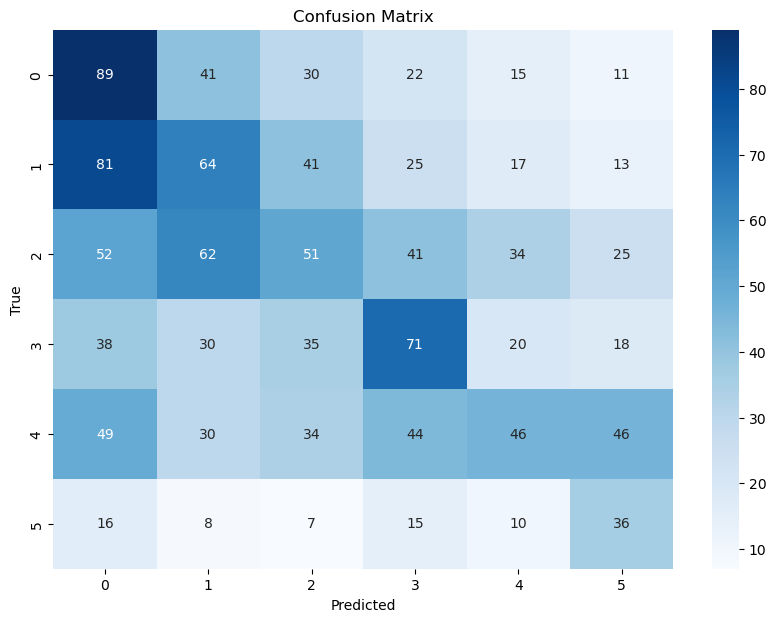

In [13]:
# ===============================
# Create Datasets and DataLoaders
# ===============================
text_train_dataset = LIARDataset(text_train_df, tokenizer, max_len=128)
text_test_dataset  = LIARDataset(text_test_df, tokenizer, max_len=128)

train_loader = DataLoader(text_train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(text_test_dataset, batch_size=16, shuffle=False)

# ===========================
# Initialize Model & Optimizer
# ===========================
model_text = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=6
)
print("Using device:", device)
model_text.to(device)

optimizer = optim.AdamW(model_text.parameters(), lr=2e-5)
EPOCHS = 5
total_steps = len(train_loader) * EPOCHS
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=int(total_steps / 3), gamma=0.1)

# =====================
# Training
# =====================
for epoch in range(1, EPOCHS+1):
    train_acc, train_loss = train_epoch(
        model=model_text,
        data_loader=train_loader,
        optimizer=optimizer,
        scheduler=scheduler,
        loss_fn=weighted_loss_fn,
        epoch_num=epoch,
        total_epochs=EPOCHS
    )
    print(f"Epoch {epoch}/{EPOCHS} - Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")

# =====================
# Testing
# =====================
test_acc, test_loss, macro_precision, macro_recall, macro_f1, cm = eval_model(
    model=model_text,
    data_loader=test_loader,
    loss_fn=weighted_loss_fn
)


# Cleanup
del model_text
torch.cuda.empty_cache()

## 3.2. Training/Testing the Text+Metadata Concat. Model

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch [1/5]: 100%|██████████| 721/721 [03:24<00:00,  3.53it/s, batch_loss=1.7900]


Epoch 1/5 - Train Loss=1.7688, Train Acc=0.1996


Epoch [2/5]: 100%|██████████| 721/721 [03:24<00:00,  3.52it/s, batch_loss=1.6539]


Epoch 2/5 - Train Loss=1.6707, Train Acc=0.2500


Epoch [3/5]: 100%|██████████| 721/721 [03:24<00:00,  3.52it/s, batch_loss=1.5390]


Epoch 3/5 - Train Loss=1.5348, Train Acc=0.3199


Epoch [4/5]: 100%|██████████| 721/721 [03:27<00:00,  3.48it/s, batch_loss=1.0327]


Epoch 4/5 - Train Loss=1.4818, Train Acc=0.3432


Epoch [5/5]: 100%|██████████| 721/721 [03:25<00:00,  3.50it/s, batch_loss=1.5061]


Epoch 5/5 - Train Loss=1.4641, Train Acc=0.3528


Evaluating: 100%|██████████| 80/80 [00:07<00:00, 11.22it/s]


Test Loss=1.7135, Test Acc=0.2565
Macro Precision=0.2626, Macro Recall=0.2666, Macro F1=0.2577


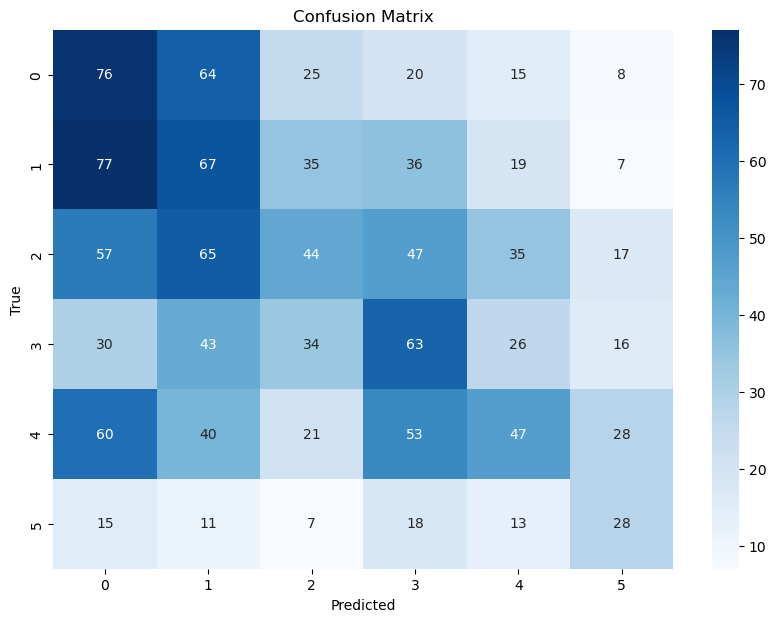

In [14]:
# ============================================
# Create Datasets/Loaders for metadata version
# ============================================
metadata_train_dataset = LIARDataset(metadata_train_df, tokenizer, max_len=128)
metadata_test_dataset  = LIARDataset(metadata_test_df, tokenizer, max_len=128)

train_loader_meta = DataLoader(metadata_train_dataset, batch_size=16, shuffle=True)
test_loader_meta  = DataLoader(metadata_test_dataset, batch_size=16, shuffle=False)

# ===========================
# Initialize Model & Optimizer
# ===========================
model_meta = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=6
)
model_meta.to(device)

optimizer_meta = optim.AdamW(model_meta.parameters(), lr=2e-5)
EPOCHS = 5
total_steps_meta = len(train_loader_meta) * EPOCHS
scheduler_meta = optim.lr_scheduler.StepLR(optimizer_meta, step_size=int(total_steps_meta / 3), gamma=0.1)

# =====================
# Training
# =====================
for epoch in range(1, EPOCHS+1):
    train_acc_m, train_loss_m = train_epoch(
        model=model_meta,
        data_loader=train_loader_meta,
        optimizer=optimizer_meta,
        scheduler=scheduler_meta,
        loss_fn=weighted_loss_fn,
        epoch_num=epoch,
        total_epochs=EPOCHS
    )
    print(f"Epoch {epoch}/{EPOCHS} - Train Loss={train_loss_m:.4f}, Train Acc={train_acc_m:.4f}")

# =====================
# Testing
# =====================
test_acc, test_loss, macro_precision, macro_recall, macro_f1, cm = eval_model(
    model=model_meta,
    data_loader=test_loader,
    loss_fn=weighted_loss_fn
)

# Cleanup
del model_meta
torch.cuda.empty_cache()


# 4. Special Concatanation Model

In [15]:
# =====================
# 4.1. Metadata Conversion
# =====================

def build_text_with_special_tokens(row):
    """
    =============================
    Convert metadata to a text string with newly added special tokens.
    This function constructs a text string by combining metadata such as speaker,
    party affiliation, and various count statistics with the statement text.
    The metadata is separated by special tokens for clarity.
    =============================
    """
    
    # Handle speaker metadata:
    speaker_str = row['speaker'] if row['speaker'] is not None else "UnknownSpeaker"
    
    # Handle party affiliation metadata:
    party_str = row['party_affiliation'] if row['party_affiliation'] is not None else "UnknownParty"
    
    # Handle numeric count metadata (barely_true_counts, false_counts, etc.):
    barely_true_str = str(int(row['barely_true_counts'])) if not pd.isnull(row['barely_true_counts']) else "0"
    false_str       = str(int(row['false_counts']))       if not pd.isnull(row['false_counts'])       else "0"
    half_true_str   = str(int(row['half_true_counts']))   if not pd.isnull(row['half_true_counts'])   else "0"
    mostly_true_str = str(int(row['mostly_true_counts'])) if not pd.isnull(row['mostly_true_counts']) else "0"
    pants_str       = str(int(row['pants_on_fire_counts'])) if not pd.isnull(row['pants_on_fire_counts']) else "0"
    
    # Construct the metadata string by adding special tokens:
    metadata_string = (
        f"<SPEAKER> {speaker_str} "
        f"<PARTY> {party_str} "
        f"<BARELY_TRUE> {barely_true_str} "
        f"<FALSE_COUNTS> {false_str} "
        f"<HALF_TRUE> {half_true_str} "
        f"<MOSTLY_TRUE> {mostly_true_str} "
        f"<PANTS_ON_FIRE> {pants_str}"
    )

    # Combine the metadata with the statement text:
    statement_text = row['statement']
    
    # Final Text:
    final_text = metadata_string + " " + statement_text
    return final_text


In [16]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim


##########################
# 4.2) SpecialTokenDataset 
##########################
class SpecialTokenDataset(Dataset):
    """
    Wraps the logic for building text with special tokens for each row 
    (via build_text_with_special_tokens) and tokenizing with a custom tokenizer.
    """
    def __init__(self, df, tokenizer, max_len=128):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len
        
        # Build the input_text by injecting special tokens for each row
        self.df['input_text'] = self.df.apply(build_text_with_special_tokens, axis=1)
        
        self.texts = self.df['input_text'].tolist()
        self.labels = self.df['label'].tolist()
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }


#########################################################
# 4.3) train_test_special_tokens_model: Main function
#     that does everything in one cell
#########################################################
def train_test_special_tokens_model(train_df, test_df, weighted_loss_fn, device, epochs=5, lr=2e-5, batch_size=16, max_len=128):
    """
    1. Create a new RobertaTokenizer.
    2. Add special tokens.
    3. Resize the model embeddings.
    4. Create datasets & dataloaders.
    5. Initialize and train a RobertaForSequenceClassification model.
    6. Evaluate on test set.
    7. Cleanup.
    """
    
    # --------------------------
    # A) Create / Extend Tokenizer
    # --------------------------
    special_tokens_dict = {
        'additional_special_tokens': [
            "<SPEAKER>", "<PARTY>", "<BARELY_TRUE>", "<FALSE_COUNTS>", 
            "<HALF_TRUE>", "<MOSTLY_TRUE>", "<PANTS_ON_FIRE>"
        ]
    }
    
    tokenizer_special = RobertaTokenizer.from_pretrained("roberta-base")
    num_added_toks = tokenizer_special.add_special_tokens(special_tokens_dict)
    print(f"[INFO] Added {num_added_toks} special tokens to tokenizer.")

    # --------------------------
    # B) Create Dataset & Dataloaders
    # --------------------------
    train_dataset = SpecialTokenDataset(train_df, tokenizer_special, max_len=max_len)
    test_dataset  = SpecialTokenDataset(test_df, tokenizer_special, max_len=max_len)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # --------------------------
    # C) Initialize Model
    # --------------------------
    model_special = RobertaForSequenceClassification.from_pretrained(
        "roberta-base",
        num_labels=6
    )
    print("Using device:", device)
    model_special.to(device)
    
    # Resize embeddings so model knows about the new special tokens
    model_special.resize_token_embeddings(len(tokenizer_special))

    # --------------------------
    # D) Define Optimizer/Scheduler
    # --------------------------
    optimizer = optim.AdamW(model_special.parameters(), lr=lr)
    total_steps = len(train_loader) * epochs
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=int(total_steps / 3), gamma=0.1)

    # --------------------------
    # E) Train
    # --------------------------
    for epoch in range(1, epochs + 1):
        train_acc, train_loss = train_epoch(
            model=model_special,
            data_loader=train_loader,
            optimizer=optimizer,
            scheduler=scheduler,
            loss_fn=weighted_loss_fn,
            epoch_num=epoch,
            total_epochs=epochs
        )
        print(f"Epoch {epoch}/{epochs} - Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")

    # --------------------------
    # F) Test
    # --------------------------
    test_acc, test_loss, macro_precision, macro_recall, macro_f1, cm = eval_model(
    model=model_special,
    data_loader=test_loader,
    loss_fn=weighted_loss_fn
    )
   

    # --------------------------
    # G) Cleanup
    # --------------------------
    del model_special
    torch.cuda.empty_cache()
    
    return test_acc, test_loss, macro_precision, macro_recall, macro_f1, cm   


[INFO] Added 7 special tokens to tokenizer.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


Epoch [1/5]: 100%|██████████| 721/721 [06:19<00:00,  1.90it/s, batch_loss=1.8097]


Epoch 1/5 - Train Loss=1.7968, Train Acc=0.1683


Epoch [2/5]: 100%|██████████| 721/721 [05:49<00:00,  2.06it/s, batch_loss=1.8171]


Epoch 2/5 - Train Loss=1.7744, Train Acc=0.1660


Epoch [3/5]: 100%|██████████| 721/721 [05:48<00:00,  2.07it/s, batch_loss=1.8079]


Epoch 3/5 - Train Loss=1.7056, Train Acc=0.1815


Epoch [4/5]: 100%|██████████| 721/721 [05:48<00:00,  2.07it/s, batch_loss=1.8309]


Epoch 4/5 - Train Loss=1.6921, Train Acc=0.1977


Epoch [5/5]: 100%|██████████| 721/721 [05:48<00:00,  2.07it/s, batch_loss=1.5793]


Epoch 5/5 - Train Loss=1.6830, Train Acc=0.2032


Evaluating: 100%|██████████| 80/80 [00:07<00:00, 11.26it/s]


Test Loss=1.6834, Test Acc=0.2060
Macro Precision=0.1651, Macro Recall=0.2675, Macro F1=0.1593


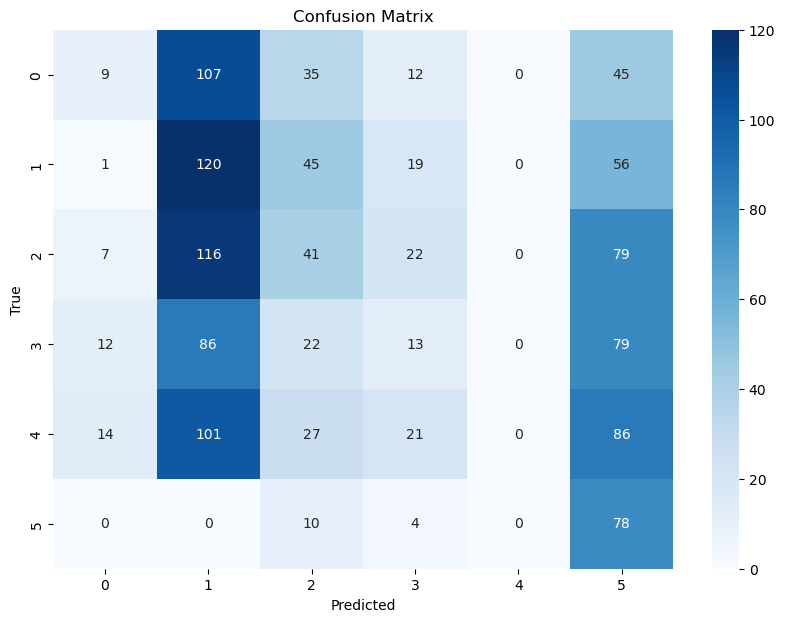

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppose you have computed class_weights from scikit-learn
weighted_loss_fn = nn.CrossEntropyLoss(weight=class_weights.to(device))

# --------------------------
# 4.4) Train and Evaluate Model
# --------------------------
# Now call the function to train and evaluate the model
test_acc, test_loss, macro_precision, macro_recall, macro_f1, cm  = train_test_special_tokens_model(
    train_df=train_df,
    test_df=test_df,
    weighted_loss_fn=weighted_loss_fn,
    device=device,
    epochs=5,
    lr=2e-5,
    batch_size=16,
    max_len=128
)

# 5. Metadata Fused Model

In [18]:
import torch
import pandas as pd
from transformers import RobertaTokenizer
import time


##############################
# 5.1) prepare_fused_data Function
##############################
def prepare_fused_data(
    df,
    tokenizer,
    party2id=None,
    max_len=128
):
    """
    Precompute all tokenization and metadata so we can see how long it takes.
    Returns a list of dictionaries, where each dict has:
        {
            'input_ids': ...,
            'attention_mask': ...,
            'metadata_vec': ...,
            'label': ...
        }
    """
    # We remove 'speaker' since you mentioned it has 3k unique in 12k dataset.
    # We'll keep the party for illustration. If you want to remove that too, skip it.
    if party2id is None:
        all_parties = df['party_affiliation'].dropna().unique()
        party2id = {p: i for i, p in enumerate(all_parties)}
    
    data_list = []
    
    t0 = time.time()
    # Convert columns once here
    text_list = df['statement'].fillna("No statement").tolist()
    label_list = df['label'].astype(int).tolist()
    
    # Numeric fields
    barely_list = df['barely_true_counts'].fillna(0).astype(float).tolist()
    false_list  = df['false_counts'].fillna(0).astype(float).tolist()
    half_list   = df['half_true_counts'].fillna(0).astype(float).tolist()
    mostly_list = df['mostly_true_counts'].fillna(0).astype(float).tolist()
    pants_list  = df['pants_on_fire_counts'].fillna(0).astype(float).tolist()
    
    # Party
    party_list = df['party_affiliation'].apply(
        lambda x: party2id[x] if x in party2id else -1
    ).tolist()
    
    for i in range(len(df)):
        text = text_list[i]
        label = label_list[i]
        
        # 1) Tokenize once, store
        encoding = tokenizer(
            text,
            max_length=max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        
        input_ids = encoding['input_ids'].squeeze(0)        # shape [max_len]
        attention_mask = encoding['attention_mask'].squeeze(0)  # shape [max_len]
        
        # 2) Numeric features
        numeric_features = [
            barely_list[i],
            false_list[i],
            half_list[i],
            mostly_list[i],
            pants_list[i]
        ]
        
        # 3) Party is categorical
        cat_features = [float(party_list[i])]
        
        metadata_vec = numeric_features + cat_features  # e.g. 5 numeric + 1 cat = 6
        
        data_item = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'metadata_vec': torch.tensor(metadata_vec, dtype=torch.float),
            'label': torch.tensor(label, dtype=torch.long)
        }
        data_list.append(data_item)
    
    t1 = time.time()
    print(f"[INFO] Prepared {len(df)} samples in {t1 - t0:.2f} seconds.")
    return data_list, party2id


tokenizer_offline = RobertaTokenizer.from_pretrained("roberta-base")

# 2) Prepare data offline
train_data_fused, party2id = prepare_fused_data(train_df, tokenizer_offline, max_len=128)
test_data_fused, _         = prepare_fused_data(test_df, tokenizer_offline, party2id=party2id, max_len=128)

[INFO] Prepared 11524 samples in 3.88 seconds.
[INFO] Prepared 1267 samples in 0.37 seconds.


In [34]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from transformers import RobertaModel  # or DistilBertModel, etc.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

##########################
# 1) Fused Dataset
##########################
class PrecomputedFusedDataset(Dataset):
    """
    This dataset simply returns the data we already prepared offline.
    """
    def __init__(self, data_list):
        self.data_list = data_list
    
    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, idx):
        return self.data_list[idx]


##########################
# 2) Model Definition
##########################
class RobertaFusedMetaModel(nn.Module):
    def __init__(
        self,
        roberta_model_name="roberta-base",  # or "distilroberta-base" for smaller model
        num_labels=6,
        metadata_dim=6,
        freeze_num_layers=10,               # Freeze first 10 layers out of 12
        freeze_embeddings=True,             # Optionally freeze embeddings too
    ):
        super().__init__()
        
        # Load RoBERTa
        self.roberta = RobertaModel.from_pretrained(roberta_model_name)
        hidden_size = self.roberta.config.hidden_size  # 768 for roberta-base

        # ----- PARTIAL FREEZING -----
        # 1) Optionally freeze all embedding parameters
        if freeze_embeddings:
            for param in self.roberta.embeddings.parameters():
                param.requires_grad = False
        
        # 2) Freeze the first 'freeze_num_layers' layers in the encoder
        for layer_idx in range(freeze_num_layers):
            for param in self.roberta.encoder.layer[layer_idx].parameters():
                param.requires_grad = False

        # A smaller MLP for metadata
        # Was [32 -> 32], let's reduce it to [16 -> 16] for speed & fewer params
        self.metadata_mlp = nn.Sequential(
            nn.Linear(metadata_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU()
        )
        
        self.classifier = nn.Linear(hidden_size + 16, num_labels)

    def forward(self, input_ids, attention_mask, metadata_vec):
        """
        input_ids: (batch_size, seq_len)
        attention_mask: (batch_size, seq_len)
        metadata_vec: (batch_size, metadata_dim)
        """
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        # [batch_size, seq_len, hidden_size]
        cls_emb = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
        
        # Pass metadata through MLP
        meta_emb = self.metadata_mlp(metadata_vec)
        
        # Concatenate
        fused = torch.cat((cls_emb, meta_emb), dim=1)
        
        # Final classification
        logits = self.classifier(fused)
        return logits


##########################
# 3) Train & Eval Loops
##########################
def train_epoch_fused(model, data_loader, optimizer, scheduler, loss_fn, epoch_num, total_epochs, device):
    model.train()
    correct_predictions = 0
    total_loss = 0.0
    
    loop = tqdm(data_loader, desc=f"Epoch [{epoch_num}/{total_epochs}]", leave=True)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        metadata_vec = batch['metadata_vec'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        logits = model(input_ids=input_ids, attention_mask=attention_mask, metadata_vec=metadata_vec)
        
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        
        if scheduler is not None:
            scheduler.step()
        
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total_loss += loss.item()
        
        loop.set_postfix({'batch_loss': f"{loss.item():.4f}"})

    epoch_acc = correct_predictions.double() / len(data_loader.dataset)
    epoch_loss = total_loss / len(data_loader)
    return epoch_acc, epoch_loss


def eval_model_fused(model, data_loader, loss_fn, device):
    model.eval()
    correct_predictions = 0
    total_loss = 0.0
    all_labels = []
    all_preds = []
    
    loop = tqdm(data_loader, desc="Evaluating", leave=True)
    with torch.no_grad():
        for batch in loop:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            metadata_vec = batch['metadata_vec'].to(device)
            labels = batch['label'].to(device)
            
            logits = model(input_ids=input_ids, attention_mask=attention_mask, metadata_vec=metadata_vec)
            loss = loss_fn(logits, labels)
            
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_loss += loss.item()
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            
            loop.set_postfix({'batch_loss': f"{loss.item():.4f}"})
    
    epoch_acc = correct_predictions.double() / len(data_loader.dataset)
    epoch_loss = total_loss / len(data_loader)
    
    # Calculate macro metrics
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro', zero_division=0)
    
    print(f"Test Loss={epoch_loss:.4f}, Test Acc={epoch_acc:.4f}")
    print(f"Macro Precision={precision:.4f}, Macro Recall={recall:.4f}, Macro F1={f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    return epoch_acc, epoch_loss, precision, recall, f1, conf_matrix


##########################
# 4) Putting It All Together
##########################
def train_test_fused_metadata_model_offline(
    train_data_list,
    test_data_list,
    weighted_loss_fn,
    device,
    epochs=5,
    lr=2e-5,
    batch_size=16,
    metadata_dim=6,
    roberta_model_name="roberta-base",  # or "distilroberta-base"
    freeze_num_layers=10,               # Freeze first 10 layers out of 12
    freeze_embeddings=True,             # Freeze embeddings
    use_scheduler=True,                 # to turn scheduler on/off
):
    """
    A function that:
      - Creates Datasets from the precomputed data
      - Defines and trains the model with partial freezing
      - Evaluates on test
    """
    
    # Create Datasets and DataLoaders
    train_dataset = PrecomputedFusedDataset(train_data_list)
    test_dataset  = PrecomputedFusedDataset(test_data_list)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize the model
    model_fused = RobertaFusedMetaModel(
        roberta_model_name=roberta_model_name,
        num_labels=6,
        metadata_dim=metadata_dim,
        freeze_num_layers=freeze_num_layers,
        freeze_embeddings=freeze_embeddings
    )
    model_fused.to(device)
    
    # Optimizer
    optimizer = optim.AdamW(model_fused.parameters(), lr=lr)
    
    # Optional: Scheduler
    scheduler = None
    if use_scheduler:
        total_steps = len(train_loader) * epochs
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=int(total_steps / 3), gamma=0.1)
    
    # Train
    for epoch in range(1, epochs + 1):
        train_acc, train_loss = train_epoch_fused(
            model=model_fused,
            data_loader=train_loader,
            optimizer=optimizer,
            scheduler=scheduler,
            loss_fn=weighted_loss_fn,
            epoch_num=epoch,
            total_epochs=epochs,
            device=device
        )
        print(f"Epoch [{epoch}/{epochs}] - Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")

    # Evaluate
    epoch_acc, epoch_loss, precision, recall, f1, conf_matrix = eval_model_fused(
        model=model_fused,
        data_loader=test_loader,
        loss_fn=weighted_loss_fn,
        device=device
    )
    
    
    # Cleanup
    del model_fused
    torch.cuda.empty_cache()
    
    return epoch_acc, epoch_loss, precision, recall, f1, conf_matrix


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch [1/3]: 100%|██████████| 721/721 [17:15<00:00,  1.44s/it, batch_loss=1.7910]


Epoch [1/3] - Train Loss=1.7745, Train Acc=0.2031


Epoch [2/3]: 100%|██████████| 721/721 [19:35<00:00,  1.63s/it, batch_loss=1.6642]


Epoch [2/3] - Train Loss=1.6929, Train Acc=0.2589


Epoch [3/3]: 100%|██████████| 721/721 [28:49<00:00,  2.40s/it, batch_loss=1.2671]


Epoch [3/3] - Train Loss=1.6793, Train Acc=0.2646


Evaluating: 100%|██████████| 80/80 [03:05<00:00,  2.32s/it, batch_loss=1.6402]


Test Loss=1.6952, Test Acc=0.2463
Macro Precision=0.2600, Macro Recall=0.2766, Macro F1=0.2443


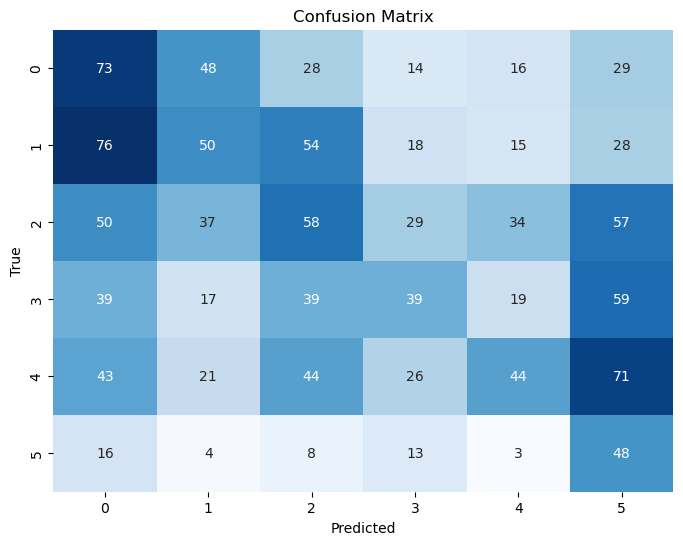

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_acc, test_loss, precision, recall, f1, conf_matrix = train_test_fused_metadata_model_offline(
    train_data_list=train_data_fused,
    test_data_list=test_data_fused,
    weighted_loss_fn=weighted_loss_fn,
    device=device,
    epochs=3,
    lr=2e-5,
    batch_size=16,
    metadata_dim=6
)



In [3]:
for i in range(10000):
    print("ne", end=" ")

ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne ne n